
[Tarea 11] Ejercicios Unidad 04-D | Gauss-Jacobi y Gauss-Seidel

Nombre: Alegria Farinango

Fecha: 28/01/2026

Repositorio: https://github.com/Aizel-shadow/Metodos_Numericos-/blob/main/TAREAS/Gauss_Jacobi_Seidel.ipynb

1. Métodos de Jacobi y Gauss-Siedel

Se realizan dos iteraciones solicitadas partiendo de $\mathbf{x}^{(0)} = \mathbf{0}$

In [33]:
import numpy as np

def jacobi_iter(A, b, x0, n_iter):
    x = x0.copy()
    D = np.diag(np.diag(A))
    LU = A - D
    for _ in range(n_iter):
        x = np.linalg.solve(D, b - LU @ x)
    return x

# Datos 1b
A1b = np.array([[10, -1, 0], [-1, 10, -2], [0, -2, 10]])
b1b = np.array([9, 7, 6])
print("1b Jacobi (2 iter):", jacobi_iter(A1b, b1b, np.zeros(3), 2))

# Datos 1c
A1c = np.array([[10, 5, 0, 0], [5, 10, -4, 0], [0, -4, 8, -1], [0, 0, -1, 5]])
b1c = np.array([6, 25, -11, -11])
print("1c Jacobi (2 iter):", jacobi_iter(A1c, b1c, np.zeros(4), 2))

# Datos 1d
A1d = np.array([[4, 1, 1, 0, 1], [-1, -3, 1, 1, 0], [2, 1, 5, -1, -1], [-1, -1, -1, 4, 0], [0, 2, -1, 1, 4]])
b1d = np.array([6, 6, 6, 6, 6])
print("1d Jacobi (2 iter):", jacobi_iter(A1d, b1d, np.zeros(5), 2))

1b Jacobi (2 iter): [0.97 0.91 0.74]
1c Jacobi (2 iter): [-0.65   1.65  -0.4   -2.475]
1d Jacobi (2 iter): [ 1.325 -1.6    1.6    1.675  2.425]


3 y 4. Resolución con Tolerancia

 $TOL = 10^{-3}$

En estos ejercicios se opta por la automatización, para llegar a la precisión necesaria: 


In [34]:
import numpy as np

# DEFINICIÓN DE FUNCIONES
def jacobi_step(A, b, x):
    """Realiza un paso de la iteración de Jacobi."""
    D = np.diag(np.diag(A))
    LU = A - D
    return np.linalg.solve(D, b - LU @ x)

def gauss_siedel_step(A, b, x):
    """Realiza un paso de la iteración de Gauss-Siedel."""
    L_plus_D = np.tril(A)
    U = A - L_plus_D
    return np.linalg.solve(L_plus_D, b - U @ x)

def resolver_iterativo(A, b, metodo='jacobi', tol=1e-3, max_iter=100):
    """Resuelve un sistema hasta alcanzar la tolerancia deseada."""
    x = np.zeros_like(b, dtype=float)
    for i in range(max_iter):
        if metodo == 'jacobi':
            x_new = jacobi_step(A, b, x)
        else:
            x_new = gauss_siedel_step(A, b, x)
            
        # Verificar si la diferencia es menor a la tolerancia
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, i + 1
        x = x_new
    return x, max_iter

# ---  EJECUCIÓN DEL EJERCICIO (Ejemplo con el sistema 1b) ---
# Matriz y vector del sistema 1b [cite: 1, 46]
A1b = np.array([[10, -1, 0], 
                [-1, 10, -2], 
                [0, -2, 10]])
b1b = np.array([9, 7, 6])

# Resolución con TOL = 10^-3 
sol_j, it_j = resolver_iterativo(A1b, b1b, metodo='jacobi')
sol_gs, it_gs = resolver_iterativo(A1b, b1b, metodo='gauss_siedel')

print(f"Resultados para el sistema 1b:")
print(f"Jacobi: {sol_j} en {it_j} iteraciones")
print(f"Gauss-Siedel: {sol_gs} en {it_gs} iteraciones")

Resultados para el sistema 1b:
Jacobi: [0.995725 0.957775 0.79145 ] en 6 iteraciones
Gauss-Siedel: [0.9957475  0.95787375 0.79157475] en 4 iteraciones


5. El sistema que falla con Jacobi (Divergencia)

In [35]:
A5 = np.array([[2, -1, 1], [2, 2, 2], [-1, -1, 2]])
b5 = np.array([-1, 4, -5])
sol_j5, it_j5 = resolver_iterativo(A5, b5, 'jacobi', max_iter=25)
sol_gs5, it_gs5 = resolver_iterativo(A5, b5, 'gauss_siedel', tol=1e-5)
print(f"\n5. Jacobi (25 iter): {sol_j5} (Diverge)")
print(f"5. Gauss-Siedel (Converge): {sol_gs5} en {it_gs5} iteraciones")


5. Jacobi (25 iter): [-20.82787284   2.         -22.82787284] (Diverge)
5. Gauss-Siedel (Converge): [ 1.00000226  1.9999975  -1.00000012] en 23 iteraciones


<>:43: SyntaxWarning: invalid escape sequence '\i'
<>:43: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Aleli\AppData\Local\Temp\ipykernel_8016\1066558466.py:43: SyntaxWarning: invalid escape sequence '\i'
  plt.ylabel('Error ($L_\infty$)')


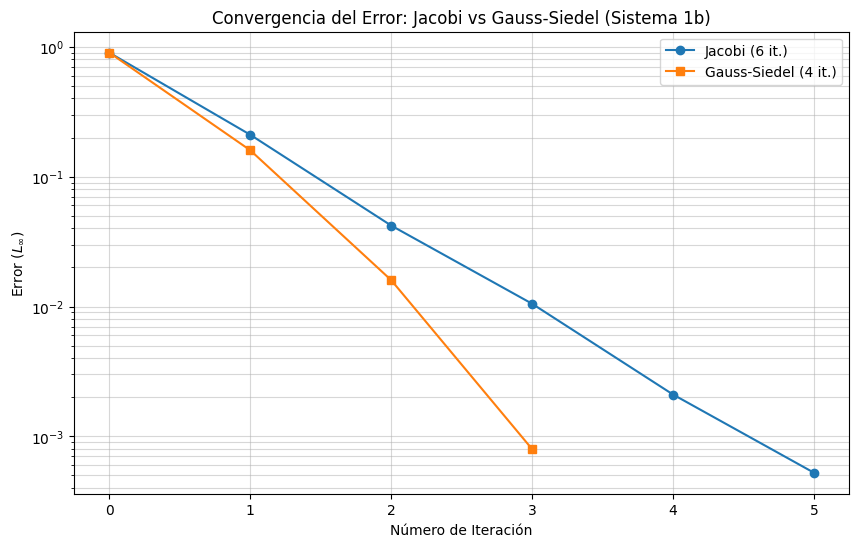

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_step(A, b, x):
    D = np.diag(np.diag(A))
    LU = A - D
    return np.linalg.solve(D, b - LU @ x)

def gauss_siedel_step(A, b, x):
    L_plus_D = np.tril(A)
    U = A - L_plus_D
    return np.linalg.solve(L_plus_D, b - U @ x)

def resolver_con_grafica(A, b, metodo='jacobi', tol=1e-3, max_iter=100):
    x = np.zeros_like(b, dtype=float)
    errores = []
    
    for i in range(max_iter):
        x_new = jacobi_step(A, b, x) if metodo == 'jacobi' else gauss_siedel_step(A, b, x)
        error = np.linalg.norm(x_new - x, ord=np.inf)
        errores.append(error)
        
        if error < tol:
            return x_new, errores
        x = x_new
    return x, errores

#  Prueba con el sistema 1b 
A1b = np.array([[10, -1, 0], [-1, 10, -2], [0, -2, 10]])
b1b = np.array([9, 7, 6])

sol_j, err_j = resolver_con_grafica(A1b, b1b, 'jacobi')
sol_gs, err_gs = resolver_con_grafica(A1b, b1b, 'gauss_siedel')

# --- Generación de la Gráfica ---
plt.figure(figsize=(10, 6))
plt.plot(err_j, label=f'Jacobi ({len(err_j)} it.)', marker='o')
plt.plot(err_gs, label=f'Gauss-Siedel ({len(err_gs)} it.)', marker='s')

plt.yscale('log') # Escala logarítmica para ver mejor la caída del error
plt.title('Convergencia del Error: Jacobi vs Gauss-Siedel (Sistema 1b)')
plt.xlabel('Número de Iteración')
plt.ylabel('Error ($L_\infty$)')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()
plt.show()

6. Diagonal Dominante y el Cambio de Sistema

In [37]:
# Sistema 6b (Gauss-Siedel con TOL 10^-2)
A6 = np.array([[1, 0, -1], [-0.5, 1, -0.25], [1, -0.5, 1]])
b6 = np.array([0.2, -1.425, 2])
sol_6b, it_6b = resolver_iterativo(A6, b6, metodo='gauss_siedel', tol=1e-2)
print(f"Solución 6b: {sol_6b}")

# Sistema 6c (Cambio en la matriz)
A6c = np.array([[1, 0, -2], [-0.5, 1, -0.25], [1, -0.5, 1]]) # Cambio x3 en la fila 1
sol_6c, it_6c = resolver_iterativo(A6c, b6, metodo='gauss_siedel', max_iter=300)
print(f"¿Qué pasa en 6c?: El sistema converge mucho más lento o diverge porque ya no es diagonal dominante.")

Solución 6b: [ 0.8975131  -0.80186517  0.70155431]
¿Qué pasa en 6c?: El sistema converge mucho más lento o diverge porque ya no es diagonal dominante.


8. Problema del Cable Coaxial

In [38]:
# Definición simplificada de la matriz del cable coaxial (12x12)
A8 = np.zeros((12, 12))
# Llenado de la diagonal y vecinos 
for i in range(12):
    A8[i, i] = 4
    if i > 0: A8[i, i-1] = -1
    if i < 11: A8[i, i+1] = -1

for i in range(8):
    A8[i, i+4] = -1
    A8[i+4, i] = -1

b8 = np.array([220, 110, 110, 220, 110, 110, 110, 110, 220, 110, 110, 220])

sol_coaxial, iterations = resolver_iterativo(A8, b8, metodo='gauss_siedel', tol=1e-2)
print("Potenciales w1 a w12:\n", sol_coaxial)

Potenciales w1 a w12:
 [155.61953348 169.7860655  182.03454735 216.85983991 232.70881638
 231.50737078 231.50883951 232.71246353 216.86392137 182.03992396
 169.79303086 155.6263736 ]
